In [156]:
import matplotlib.pyplot as plt

In [157]:
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

In [158]:
import numpy as np

In [159]:
from skimage.feature import hog
from skimage import data, exposure
from skimage import io
from skimage.feature import greycomatrix
import cv2

In [160]:
image = cv2.imread(r"/home/preethi/Projects/Face_Recognition/testfaces/Geo.jpg")

In [161]:
print(image)

[[[  0   0  14]
  [  0   0  14]
  [  0   0  12]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  1   0  29]
  [  1   0  28]
  [  0   0  26]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 14   8  65]
  [ 12   7  62]
  [ 10   6  58]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ..., 
 [[ 16   2 128]
  [ 17   3 128]
  [ 17   3 128]
  ..., 
  [214 222 245]
  [211 219 242]
  [210 218 241]]

 [[ 17   3 128]
  [ 17   3 128]
  [ 16   2 127]
  ..., 
  [214 221 241]
  [213 220 240]
  [209 216 236]]

 [[ 17   3 128]
  [ 17   3 128]
  [ 16   3 125]
  ..., 
  [213 220 240]
  [211 218 238]
  [207 214 234]]]


In [162]:
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imagedemo=image
gray = np.sqrt((image*image).sum(-1)) 
image=gray

In [163]:

fd, hog_image=hog(image, orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualise= True)

/home/preethi/anaconda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [164]:
print(image)

[[ 14.          14.          12.         ...,   0.           0.           0.        ]
 [  8.60232527   4.12310563  12.80624847 ...,   0.           0.           0.        ]
 [ 19.72308292  14.03566885  13.11487705 ...,   0.           0.           0.        ]
 ..., 
 [  2.           6.4807407    6.4807407  ...,  21.9317122   22.75961335
   21.37755833]
 [  6.4807407    6.4807407    2.23606798 ...,  25.57342371   8.54400375
   19.20937271]
 [  6.4807407    6.4807407    4.24264069 ...,   8.54400375  21.56385865
   23.51595203]]


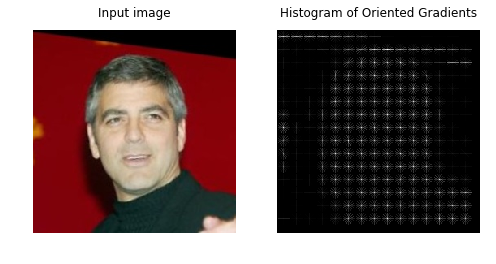

In [165]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(imagedemo, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [166]:
# face detection

In [167]:
import face_recognition

In [168]:

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

import numpy as np
import cv2
%matplotlib inline

In [169]:
image = cv2.imread(r"/home/preethi/Projects/Face_Recognition/testfaces/Geo.jpg")
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

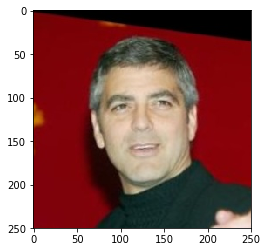

In [170]:
plt.imshow(image)

In [171]:
#To find all faces on image

face_locations= face_recognition.face_locations(image)
num_faces=len(face_locations)
print("Found {} face(s) in input image.".format(num_faces))


Found 1 face(s) in input image.


(80, 175, 187, 67)


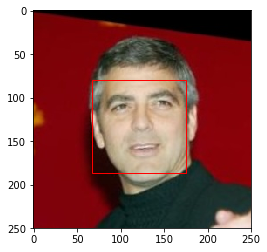

In [172]:
#Axis handle

plt.imshow(image)
ax=plt.gca()

#repeat for all faces

for face_location in face_locations:
    print(face_location)
    top,right,bottom,left=face_location
    x,y,w,h=left,top,right,bottom
    rect= Rectangle((x,y),w-x,h-y, fill=False, color='red')
    ax.add_patch(rect)

plt.show()

In [173]:
# Face Recognition

In [174]:
images =[]
path= "/home/preethi/Projects/Face_Recognition/testfaces/image"
suffix = ".jpg"
i=1

In [175]:
for i in range(1,11) :
    s=path+str(i)+suffix
    images.append(cv2.imread(s))
    images[i-1]= cv2.cvtColor(images[i-1], cv2.COLOR_BGR2RGB)
    

In [176]:
# Get Face Encodings

known_face_encodings = []
for i in range(10):
    known_face_encodings.append(face_recognition.face_encodings(images[i]))



In [177]:
unknown_face_encodings= face_recognition.face_encodings(image)

In [178]:
from scipy.spatial import distance
results= []
for unknown_face_encoding in unknown_face_encodings:
   
    for known_face_encoding in known_face_encodings:
        a= distance.euclidean(known_face_encoding,unknown_face_encoding)
        results.append(a)
    threshold=0.6
    results= np.array(results) <= threshold
    
    name= "Unknown"
    namelist=["Abdullah","George","Elena","Fran","Dan","Jackie","Jerry","Jessica","John","Kelli","Malik","Martha","Oxana","Rachel","Robbie","Sara","Ted","Wen","Wen"]
    
    l=len(results)
    
    for j in range(l):
        if results[j]:
            name = namelist[j]
   
        
    
    print("Found {} in the Photo".format(name))
    
    
    
    

Found George in the Photo
